In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.4 MB/s eta 0:00:00


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,matthews_corrcoef,confusion_matrix,roc_auc_score

We have 3 files in this dataset from kaggle , where now we will merge the test and validate data to increase our testing dataset and store it as final_data.csv

In [77]:
#TEST DATA OF ROTTEN TOMATOES
# import pandas as pd
# csv_file1 = "test.csv"
# csv_file3 = "validation.csv"

# df1 = pd.read_csv(csv_file1)
# df3 = pd.read_csv(csv_file3)

# appended_df = pd.concat([df1, df3], ignore_index=True)
# shuffled_df = appended_df.sample(frac=1).reset_index(drop=True)
# shuffled_df.to_csv("test.csv", index=False)


In [30]:
import pandas as pd
test_data=pd.read_csv('test.csv')

In [36]:
test_data

,text,label
0,lovingly photographed in the manner of a golde...,1
1,consistently clever and suspenseful .,1
2,"it's like a "" big chill "" reunion of the baade...",1
3,the story gives ample opportunity for large-sc...,1
4,"red dragon "" never cuts corners .",1
...,...,...
2127,"this picture is murder by numbers , and as eas...",0
2128,hilarious musical comedy though stymied by acc...,0
2129,"if you are into splatter movies , then you wil...",0
2130,"a dull , simple-minded and stereotypical tale ...",0


# **FIRST MODEL distilbert-base-uncased-finetuned-sst-2-english**

In [32]:
model_name='distilbert-base-uncased-finetuned-sst-2-english'
from transformers import AutoModelForSequenceClassification, AutoTokenizer,AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained(model_name,from_tf=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)

from transformers import pipeline

nlp = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)


All TF 2.0 model weights were used when initializing DistilBertForQuestionAnswering.

All the weights of DistilBertForQuestionAnswering were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertForQuestionAnswering for predictions without further training.


In [46]:
text_data = test_data["text"].tolist()

In [47]:
len(text_data)

2132

In [48]:
label_mapping = {"POSITIVE": 1, "NEGATIVE": 0}
predictions = nlp(text_data)
predicted_labels = [label_mapping[result['label']] for result in predictions]


In [37]:

actual_labels = test_data["label"].tolist()

In [40]:
len(predicted_labels)

1066

In [49]:
accuracy_distilbert = accuracy_score(actual_labels, predicted_labels)
precision_distilbert = precision_score(actual_labels, predicted_labels, average='weighted')
recall_distilbert = recall_score(actual_labels, predicted_labels, average='weighted')
f1_distilbert = f1_score(actual_labels, predicted_labels, average='weighted')
roc_auc_distilbert = roc_auc_score(actual_labels, predicted_labels)
conf_matrix_distilbert = confusion_matrix(actual_labels, predicted_labels)
mcc_distilbert = matthews_corrcoef(actual_labels, predicted_labels)
print(f"Accuracy: {accuracy_distilbert}")
print(f"Precision: {precision_distilbert}")
print(f"Recall: {recall_distilbert}")
print(f"F1 Score: {f1_distilbert}")
print(f"ROC-AUC: {roc_auc_distilbert}")
print("Confusion Matrix:")
print(conf_matrix_distilbert)
print(f"MCC: {mcc_distilbert}")

Accuracy: 0.901031894934334
Precision: 0.9010350711534416
Recall: 0.901031894934334
F1 Score: 0.901031698975781
ROC-AUC: 0.901031894934334
Confusion Matrix:
[[962 104]
 [107 959]]
MCC: 0.8020669660814868


# **SECOND MODEL michelecafagna26/gpt2-medium-finetuned-sst2-sentiment**

In [50]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification

tokenizer1 = GPT2Tokenizer.from_pretrained("michelecafagna26/gpt2-medium-finetuned-sst2-sentiment")
model1 = GPT2ForSequenceClassification.from_pretrained("michelecafagna26/gpt2-medium-finetuned-sst2-sentiment")


from transformers import pipeline

nlp = pipeline("sentiment-analysis", model="michelecafagna26/gpt2-medium-finetuned-sst2-sentiment", tokenizer="michelecafagna26/gpt2-medium-finetuned-sst2-sentiment")

In [51]:
predictions = nlp(text_data)
predicted_labels_ = [label_mapping[result['label']] for result in predictions]


In [52]:
accuracy_gpt2 = accuracy_score(actual_labels,predicted_labels_)
precision_gpt2 = precision_score(actual_labels, predicted_labels_, average='weighted')
recall_gpt2 = recall_score(actual_labels, predicted_labels_, average='weighted')
f1_gpt2 = f1_score(actual_labels, predicted_labels_, average='weighted')
roc_auc_gpt2 = roc_auc_score(actual_labels,predicted_labels_)
conf_matrix_gpt2 = confusion_matrix(actual_labels,predicted_labels_)
mcc_gpt2 = matthews_corrcoef(actual_labels,predicted_labels_)

print(f"Accuracy: {accuracy_gpt2}")
print(f"Precision: {precision_gpt2}")
print(f"Recall: {recall_gpt2}")
print(f"F1 Score: {f1_gpt2}")
print(f"ROC-AUC: {roc_auc_gpt2}")
print("Confusion Matrix:")
print(conf_matrix_gpt2)
print(f"MCC: {mcc_gpt2}")

Accuracy: 0.9015009380863039
Precision: 0.9015136581244719
Recall: 0.9015009380863039
F1 Score: 0.9015001579623125
ROC-AUC: 0.9015009380863039
Confusion Matrix:
[[958 108]
 [102 964]]
MCC: 0.8030145961100309


# **THIRD MODELecharlaix/bert-base-uncased-sst2-acc91.1-d37-hybrid**

In [55]:
pip install nn_pruning

In [56]:
from transformers import pipeline
from nn_pruning.inference_model_patcher import optimize_model

cls_pipeline = pipeline(
    "text-classification",
    model="echarlaix/bert-base-uncased-sst2-acc91.1-d37-hybrid",
    tokenizer="echarlaix/bert-base-uncased-sst2-acc91.1-d37-hybrid",
)

print(f"Parameters count (includes only head pruning, no feed forward pruning)={int(cls_pipeline.model.num_parameters() / 1E6)}M")
cls_pipeline.model = optimize_model(cls_pipeline.model, "dense")


pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Parameters count (includes only head pruning, no feed forward pruning)=92M
removed heads 0, total_heads=56, percentage removed=0.0
bert.encoder.layer.0.intermediate.dense, sparsity = 45.54
bert.encoder.layer.0.output.dense, sparsity = 45.54
bert.encoder.layer.1.intermediate.dense, sparsity = 42.35
bert.encoder.layer.1.output.dense, sparsity = 42.35
bert.encoder.layer.2.intermediate.dense, sparsity = 30.57
bert.encoder.layer.2.output.dense, sparsity = 30.57
bert.encoder.layer.3.intermediate.dense, sparsity = 27.60
bert.encoder.layer.3.output.dense, sparsity = 27.60
bert.encoder.layer.4.intermediate.dense, sparsity = 30.57
bert.encoder.layer.4.output.dense, sparsity = 30.57
bert.encoder.layer.5.intermediate.dense, sparsity = 32.36
bert.encoder.layer.5.output.dense, sparsity = 32.36
bert.encoder.layer.6.intermediate.dense, sparsity = 38.57
bert.encoder.layer.6.output.dense, sparsity = 38.57
bert.encoder.layer.7.intermediate.dense, sparsity = 50.65
bert.encoder.layer.7.output.dense, sparsi

In [44]:
predictions = cls_pipeline(text_data)


In [61]:
label_mapping = {"LABEL_1": 1, "LABEL_0": 0}
predicted_labels_ = [label_mapping[result['label']] for result in predictions]

In [62]:
accuracy_bert = accuracy_score(actual_labels, predicted_labels_)
precision_bert = precision_score(actual_labels, predicted_labels_, average='weighted')
recall_bert = recall_score(actual_labels, predicted_labels_, average='weighted')
f1_bert = f1_score(actual_labels, predicted_labels_, average='weighted')
roc_auc_bert = roc_auc_score(actual_labels, predicted_labels_)
conf_matrix_bert = confusion_matrix(actual_labels, predicted_labels_)
mcc_bert = matthews_corrcoef(actual_labels, predicted_labels_)

print(f"Accuracy: {accuracy_bert}")
print(f"Precision: {precision_bert}")
print(f"Recall: {recall_bert}")
print(f"F1 Score: {f1_bert}")
print(f"ROC-AUC: {roc_auc_bert}")
print("Confusion Matrix:")
print(conf_matrix_bert)
print(f"MCC: {mcc_bert}")


Accuracy: 0.900562851782364
Precision: 0.9005642617780406
Recall: 0.900562851782364
F1 Score: 0.9005627642770087
ROC-AUC: 0.900562851782364
Confusion Matrix:
[[959 107]
 [105 961]]
MCC: 0.8011271135591638


# **FOURTH MODEL Hazqeel/electra-small-finetuned-sst2-rotten_tomatoes-distilled**

In [68]:
model_name='Hazqeel/electra-small-finetuned-sst2-rotten_tomatoes-distilled'
from transformers import AutoModelForSequenceClassification, AutoTokenizer,AutoModelForQuestionAnswering, AutoModelForMaskedLM
from transformers import ElectraForPreTraining, ElectraTokenizerFast
import torch

discriminator = ElectraForPreTraining.from_pretrained(model_name)
tokenizer = ElectraTokenizerFast.from_pretrained(model_name)

from transformers import pipeline

nlp = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)


model.safetensors:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

Some weights of ElectraForPreTraining were not initialized from the model checkpoint at Hazqeel/electra-small-finetuned-sst2-rotten_tomatoes-distilled and are newly initialized: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [69]:
predictions = nlp(text_data)

In [71]:
label_mapping = {"positive": 1, "negative": 0}
predicted_labels_ = [label_mapping[result['label']] for result in predictions]

In [72]:
accuracy_electra = accuracy_score(actual_labels, predicted_labels_)
precision_electra = precision_score(actual_labels, predicted_labels_, average='weighted')
recall_electra = recall_score(actual_labels, predicted_labels_, average='weighted')
f1_electra = f1_score(actual_labels, predicted_labels_, average='weighted')
roc_auc_electra = roc_auc_score(actual_labels, predicted_labels_)
conf_matrix_electra = confusion_matrix(actual_labels, predicted_labels_)
mcc_electra = matthews_corrcoef(actual_labels, predicted_labels_)

# Print metrics
print(f"Accuracy: {accuracy_electra}")
print(f"Precision: {precision_electra}")
print(f"Recall: {recall_electra}")
print(f"F1 Score: {f1_electra}")
print(f"ROC-AUC: {roc_auc_electra}")
print("Confusion Matrix:")
print(conf_matrix_electra)
print(f"MCC: {mcc_electra}")

Accuracy: 0.9324577861163227
Precision: 0.9328981677237491
Recall: 0.9324577861163227
F1 Score: 0.9324406042953454
ROC-AUC: 0.9324577861163227
Confusion Matrix:
[[ 977   89]
 [  55 1011]]
MCC: 0.8653558417844652


# **#FIFTH MODEL Vishnou/TinyBERT_SST2**

In [91]:
model_name='Vishnou/TinyBERT_SST2'
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained('Vishnou/TinyBERT_SST2')
model = AutoModel.from_pretrained('Vishnou/TinyBERT_SST2')

from transformers import pipeline

nlp = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)



tokenizer_config.json:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/57.4M [00:00<?, ?B/s]

In [92]:
predictions = nlp(text_data)


In [93]:
predictions

[{'label': 'LABEL_1', 'score': 0.9989908337593079},
 {'label': 'LABEL_1', 'score': 0.9989564418792725},
 {'label': 'LABEL_0', 'score': 0.9810876846313477},
 {'label': 'LABEL_1', 'score': 0.999006450176239},
 {'label': 'LABEL_1', 'score': 0.9985744953155518},
 {'label': 'LABEL_1', 'score': 0.9987658262252808},
 {'label': 'LABEL_1', 'score': 0.9989494681358337},
 {'label': 'LABEL_1', 'score': 0.9987670183181763},
 {'label': 'LABEL_1', 'score': 0.9983639121055603},
 {'label': 'LABEL_1', 'score': 0.9988067150115967},
 {'label': 'LABEL_1', 'score': 0.9965984225273132},
 {'label': 'LABEL_0', 'score': 0.9979938268661499},
 {'label': 'LABEL_1', 'score': 0.9979223608970642},
 {'label': 'LABEL_1', 'score': 0.9989631175994873},
 {'label': 'LABEL_0', 'score': 0.9977450370788574},
 {'label': 'LABEL_1', 'score': 0.9989796280860901},
 {'label': 'LABEL_1', 'score': 0.9990088939666748},
 {'label': 'LABEL_1', 'score': 0.9989853501319885},
 {'label': 'LABEL_1', 'score': 0.998281717300415},
 {'label': 'LA

In [44]:
label_mapping = {"LABEL_1": 1, "LABEL_0": 0}
predicted_labels_ = [label_mapping[result] for result in predictions]

In [95]:
accuracy_tinybart = accuracy_score(actual_labels, predicted_labels_)
precision_tinybart = precision_score(actual_labels, predicted_labels_, average='weighted')
recall_tinybart = recall_score(actual_labels, predicted_labels_, average='weighted')
f1_tinybart = f1_score(actual_labels, predicted_labels_, average='weighted')
roc_auc_tinybart = roc_auc_score(actual_labels, predicted_labels_)
conf_matrix_tinybart = confusion_matrix(actual_labels, predicted_labels_)
mcc_tinybart = matthews_corrcoef(actual_labels, predicted_labels_)

print("\nMetrics for TinyBERT:")
print(f"Accuracy: {accuracy_tinybart}")
print(f"Precision: {precision_tinybart}")
print(f"Recall: {recall_tinybart}")
print(f"F1 Score: {f1_tinybart}")
print(f"ROC-AUC: {roc_auc_tinybart}")
print("Confusion Matrix:")
print(conf_matrix_tinybart)
print(f"MCC: {mcc_tinybart}")


Metrics for TinyBART:
Accuracy: 0.8827392120075047
Precision: 0.8827513376513658
Recall: 0.8827392120075047
F1 Score: 0.8827382832884673
ROC-AUC: 0.8827392120075047
Confusion Matrix:
[[938 128]
 [122 944]]
MCC: 0.7654905495628331


### **SIXTH MODEL roberta-base-finetuned-sst2**

In [99]:
from transformers import RobertaConfig, RobertaModel,RobertaTokenizer
model = RobertaModel.from_pretrained('rasyosef/roberta-base-finetuned-sst2',from_tf=True)
tokenizer = RobertaTokenizer.from_pretrained("rasyosef/roberta-base-finetuned-sst2")

tf_model.h5:   0%|          | 0.00/499M [00:00<?, ?B/s]

All TF 2.0 model weights were used when initializing RobertaModel.

All the weights of RobertaModel were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use RobertaModel for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

In [100]:
model_name="rasyosef/roberta-base-finetuned-sst2"
from transformers import pipeline

nlp = pipeline("sentiment-analysis", model=model_name, tokenizer=model_name)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at rasyosef/roberta-base-finetuned-sst2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [102]:
predictions = nlp(text_data)


In [104]:
label_mapping = {"positive": 1, "negative": 0}
predicted_labels_ = [label_mapping[result['label']] for result in predictions]

In [105]:
accuracy_roberta = accuracy_score(actual_labels, predicted_labels_)
precision_roberta = precision_score(actual_labels, predicted_labels_, average='weighted')
recall_roberta = recall_score(actual_labels, predicted_labels_, average='weighted')
f1_roberta = f1_score(actual_labels, predicted_labels_, average='weighted')
roc_auc_roberta = roc_auc_score(actual_labels, predicted_labels_)
conf_matrix_roberta = confusion_matrix(actual_labels, predicted_labels_)
mcc_roberta = matthews_corrcoef(actual_labels, predicted_labels_)

print("\nMetrics for RoBERTa:")
print(f"Accuracy: {accuracy_roberta}")
print(f"Precision: {precision_roberta}")
print(f"Recall: {recall_roberta}")
print(f"F1 Score: {f1_roberta}")
print(f"ROC-AUC: {roc_auc_roberta}")
print("Confusion Matrix:")
print(conf_matrix_roberta)
print(f"MCC: {mcc_roberta}")


Metrics for RoBERTa:
Accuracy: 0.9127579737335835
Precision: 0.9127812217282177
Recall: 0.9127579737335835
F1 Score: 0.912756745340303
ROC-AUC: 0.9127579737335835
Confusion Matrix:
[[969  97]
 [ 89 977]]
MCC: 0.8255391951344581


#SEVENTH MODEL t5-base-finetuned-sst2-sentiment

In [107]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("michelecafagna26/t5-base-finetuned-sst2-sentiment")
model = T5ForConditionalGeneration.from_pretrained("michelecafagna26/t5-base-finetuned-sst2-sentiment")


tokenizer_config.json:   0%|          | 0.00/1.95k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

In [111]:
def get_sentiment(text):

    inputs = tokenizer("sentiment: " + text, max_length=128, truncation=True, return_tensors="pt").input_ids
    preds = model.generate(inputs)
    decoded_preds = tokenizer.batch_decode(sequences=preds, skip_special_tokens=True)

    return decoded_preds

In [114]:

predictions = []
for text in text_data:
    sentiment = get_sentiment(text)
    predictions.append(sentiment)

In [115]:
predictions

[['p'],
 ['p'],
 ['n'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['n'],
 ['p'],
 ['p'],
 ['n'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['n'],
 ['p'],
 ['p'],
 ['n'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['n'],
 ['p'],
 ['p'],
 ['n'],
 ['p'],
 ['n'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['n'],
 ['p'],
 ['p'],
 ['n'],
 ['n'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],
 ['p'],


In [119]:
label_mapping = {'p': 1, 'n': 0}
predicted_labels_ = [label_mapping[result[0]] for result in predictions]

In [121]:
accuracy_t5 = accuracy_score(actual_labels, predicted_labels_)
precision_t5 = precision_score(actual_labels, predicted_labels_, average='weighted')
recall_t5 = recall_score(actual_labels, predicted_labels_, average='weighted')
f1_t5 = f1_score(actual_labels, predicted_labels_, average='weighted')
conf_matrix_t5 = confusion_matrix(actual_labels, predicted_labels_)
mcc_t5 = matthews_corrcoef(actual_labels, predicted_labels_)

# Print metrics for T5
print("\nMetrics for T5:")
print(f"Accuracy: {accuracy_t5}")
print(f"Precision: {precision_t5}")
print(f"Recall: {recall_t5}")
print(f"F1 Score: {f1_t5}")
print("Confusion Matrix:")
print(conf_matrix_t5)
print(f"MCC: {mcc_t5}")


Metrics for T5:
Accuracy: 0.9038461538461539
Precision: 0.9039261317576934
Recall: 0.9038461538461539
F1 Score: 0.9038413939631686
Confusion Matrix:
[[956 110]
 [ 95 971]]
MCC: 0.8077722816445221


# **SCORES**

In [12]:
model_names = ["t5", "gpt2", "bert", "electra", "tinybart", "roberta", "distilbert"]

data = []

for model in model_names:
    accuracy = globals().get(f"accuracy_{model}")
    precision = globals().get(f"precision_{model}")
    recall = globals().get(f"recall_{model}")
    f1 = globals().get(f"f1_{model}")
    mcc = globals().get(f"mcc_{model}")

    data.append([model.capitalize(), accuracy, precision, recall, f1, mcc])

# Create a DataFrame
columns = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "MCC"]
df_final = pd.DataFrame(data, columns=columns)

# Print the DataFrame
print(df_final)

In [12]:
df_final['Model'] = df_final['Model'].replace({'Tinybart': 'Tinybert'})
print(df_final)

        Model  Accuracy  Precision    Recall  F1 Score       MCC
0          T5  0.903846   0.903926  0.903846  0.903841  0.807772
1        Gpt2  0.901501   0.901514  0.901501  0.901500  0.803015
2        Bert  0.900563   0.900564  0.900563  0.900563  0.801127
3     Electra  0.932458   0.932898  0.932458  0.932441  0.865356
4    Tinybert  0.882739   0.882751  0.882739  0.882738  0.765491
5     Roberta  0.912758   0.912781  0.912758  0.912757  0.825539
6  Distilbert  0.901032   0.901035  0.901032  0.901032  0.802067


In [14]:
df_final.to_csv('text_classification_results.csv', index=False)

# **TOPSIS**

In [5]:
!pip install Topsis-Vansh-102103072==1.1.1

  Preparing metadata (setup.py) ... done
  Created wheel for Topsis-Vansh-102103072: filename=Topsis_Vansh_102103072-1.1.1-py3-none-any.whl size=4268 sha256=4dbaabe4e53f5a06ba4af3e60a7246f9951eb56dc990b9767703bb84f55a1ea0
  Stored in directory: /root/.cache/pip/wheels/4d/ce/15/5be27c6539082fdb925be75ebcdcc3507593ba91734abc826e
Successfully built Topsis-Vansh-102103072


In [15]:
argument_value_1 = "text_classification_results.csv"
argument_value_2 = "1,2,2,2,1"
argument_value_3 = "+,+,+,+,+"
argument_value_4 = "topsis_results.csv"
!topsis $argument_value_1 $argument_value_2 $argument_value_3 $argument_value_4

Output file: topsis_results.csv is written successfully
        Model  Accuracy  Precision    Recall  F1 Score       MCC  Topsis Score  Rank
0          T5  0.903846   0.903926  0.903846  0.903841  0.807772      0.423714     3
1        Gpt2  0.901501   0.901514  0.901501  0.901500  0.803015      0.376217     4
2        Bert  0.900563   0.900564  0.900563  0.900563  0.801127      0.357328     6
3     Electra  0.932458   0.932898  0.932458  0.932441  0.865356      1.000000     1
4    Tinybert  0.882739   0.882751  0.882739  0.882738  0.765491      0.000000     7
5     Roberta  0.912758   0.912781  0.912758  0.912757  0.825539      0.602016     2
6  Distilbert  0.901032   0.901035  0.901032  0.901032  0.802067      0.366745     5


In [28]:
df_result=pd.read_csv("text_classification_results.csv")

In [33]:
display(df_result)

,Model,Accuracy,Precision,Recall,F1 Score,MCC
0,T5,0.903846,0.903926,0.903846,0.903841,0.807772
1,Gpt2,0.901501,0.901514,0.901501,0.901500,0.803015
2,Bert,0.900563,0.900564,0.900563,0.900563,0.801127
3,Electra,0.932458,0.932898,0.932458,0.932441,0.865356
4,Tinybert,0.882739,0.882751,0.882739,0.882738,0.765491
5,Roberta,0.912758,0.912781,0.912758,0.912757,0.825539
6,Distilbert,0.901032,0.901035,0.901032,0.901032,0.802067


# **TABLES AND PLOTS **

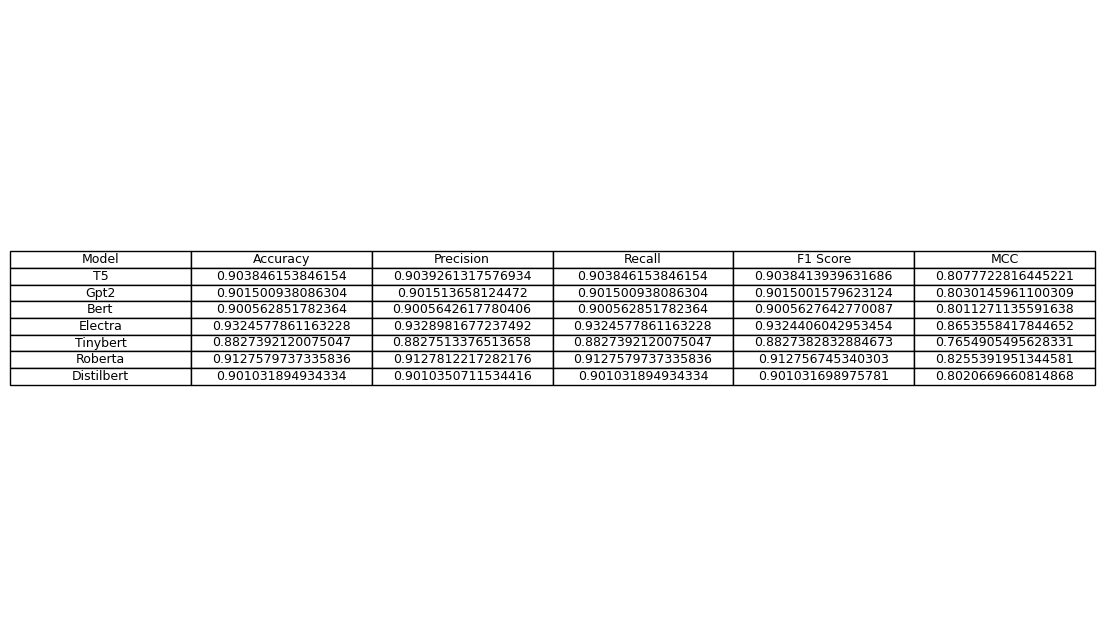

In [44]:
import matplotlib.pyplot as plt
from pandas.plotting import table
fig, ax = plt.subplots(figsize=(14, 8))

# Hide the axes
ax.axis('off')
table_data = ax.table(cellText=df_result.values,
                      colLabels=df_result.columns,
                      cellLoc='center',
                      loc='center')

plt.savefig('result_image.png', bbox_inches='tight', pad_inches=0.05)

plt.show()

In [38]:
df_topsis=pd.read_csv("/content/topsis_results.csv")

In [39]:
df_topsis

,Model,Accuracy,Precision,Recall,F1 Score,MCC,Topsis Score,Rank
0,T5,0.903846,0.903926,0.903846,0.903841,0.807772,0.423714,3
1,Gpt2,0.901501,0.901514,0.901501,0.901500,0.803015,0.376217,4
2,Bert,0.900563,0.900564,0.900563,0.900563,0.801127,0.357328,6
3,Electra,0.932458,0.932898,0.932458,0.932441,0.865356,1.000000,1
4,Tinybert,0.882739,0.882751,0.882739,0.882738,0.765491,0.000000,7
5,Roberta,0.912758,0.912781,0.912758,0.912757,0.825539,0.602016,2
6,Distilbert,0.901032,0.901035,0.901032,0.901032,0.802067,0.366745,5


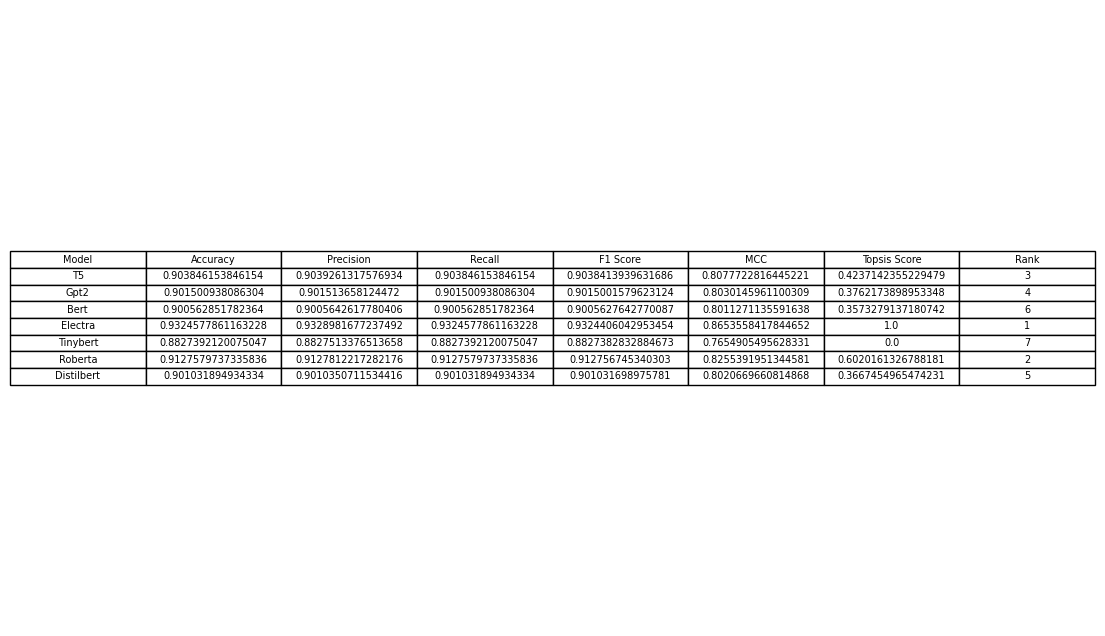

In [43]:
fig, ax = plt.subplots(figsize=(14, 8))

# Hide the axes
ax.axis('off')
table_data = ax.table(cellText=df_topsis.values,
                      colLabels=df_topsis.columns,
                      cellLoc='center',
                      loc='center')

plt.savefig('topsis_image.png', bbox_inches='tight', pad_inches=0.05)

plt.show()

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrices = {
    "t5": conf_matrix_t5,
    "gpt2": conf_matrix_gpt2,
    "bert": conf_matrix_bert,
    "electra": conf_matrix_electra,
    "tinybert": conf_matrix_tinybart,
    "roberta": conf_matrix_roberta,
    "distilbert": conf_matrix_distilbert
}
for model_name, conf_matrix in conf_matrices.items():
    if conf_matrix is not None:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=['Predicted Negative', 'Predicted Positive'],
                    yticklabels=['Actual Negative', 'Actual Positive'], ax=ax)

        ax.set_title(f'Confusion Matrix - {model_name.capitalize()} Model')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
        plt.savefig(f'confusion_matrix_{model_name}.png', bbox_inches='tight', pad_inches=0.05)
        plt.close()


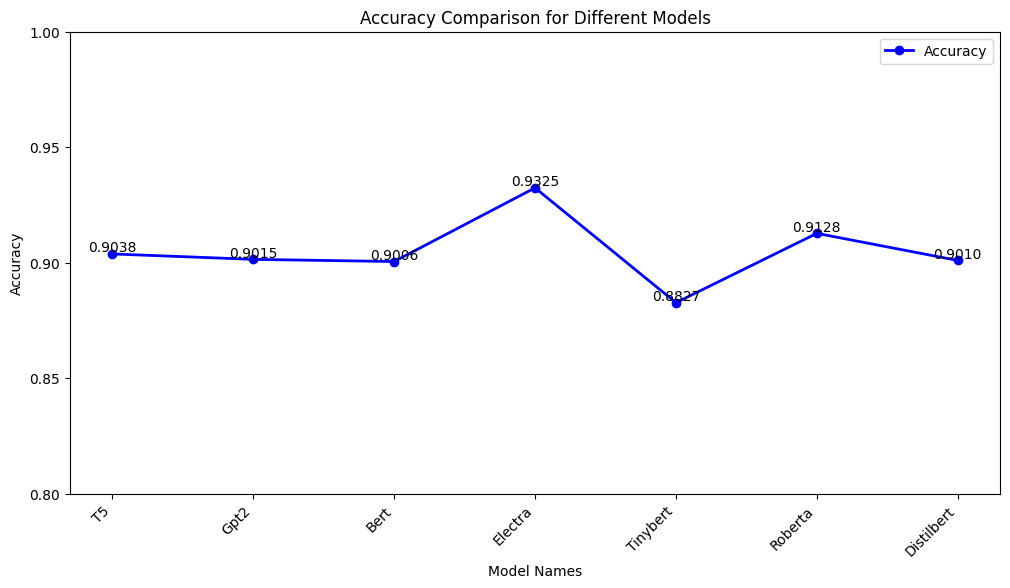

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/text_classification_results.csv')
model_column = 'Model'
accuracy_column = 'Accuracy'
model_names = df[model_column].tolist()
accuracies = df[accuracy_column].tolist()
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(model_names, accuracies, marker='o', label='Accuracy', color='blue', linestyle='-', linewidth=2)
for model, accuracy in zip(model_names, accuracies):
    ax.text(model, accuracy + 0.001, f'{accuracy:.4f}', ha='center', color='black')

ax.set_xlabel('Model Names')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison for Different Models')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.yticks([i/100 for i in range(80, 101, 5)])
plt.savefig('accuracy.png', bbox_inches='tight')
plt.show()

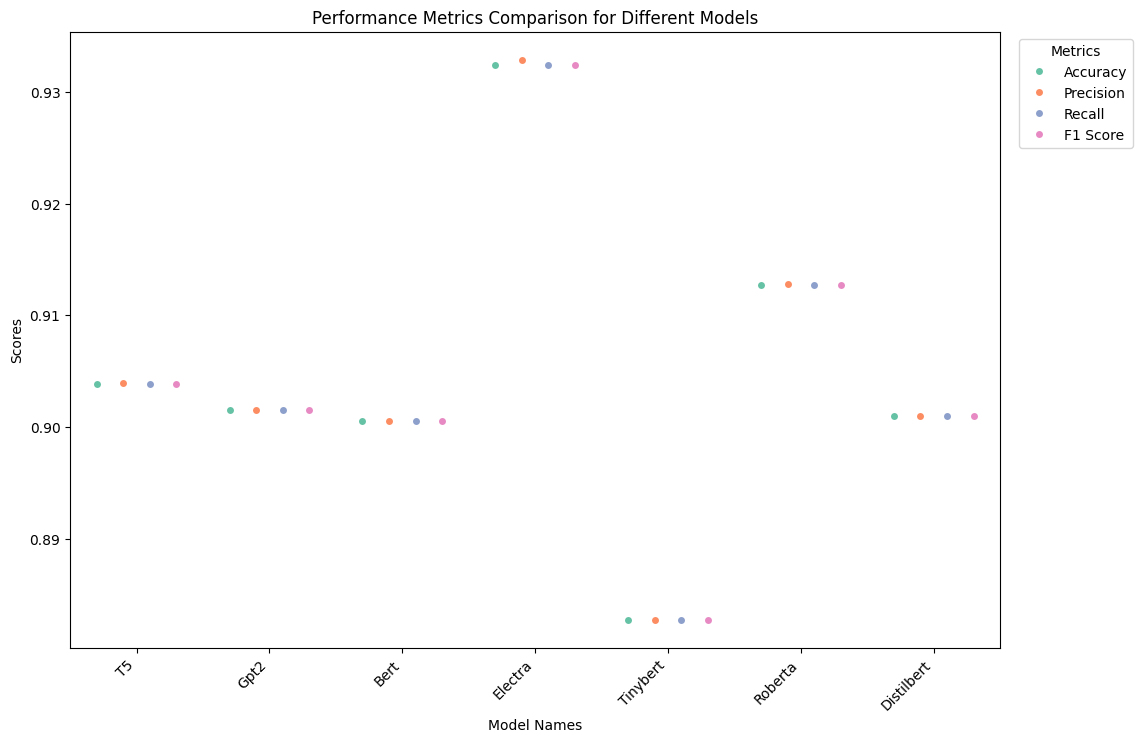

In [51]:
model_column = 'Model'
accuracy_column = 'Accuracy'
precision_column = 'Precision'
recall_column = 'Recall'
f1_column = 'F1 Score'
df_melted = pd.melt(df, id_vars=[model_column], value_vars=[accuracy_column, precision_column, recall_column, f1_column])
plt.figure(figsize=(12, 8))
sns.stripplot(x=model_column, y='value', hue='variable', data=df_melted, jitter=True, dodge=True, palette='Set2')
plt.xlabel('Model Names')
plt.ylabel('Scores')
plt.title('Performance Metrics Comparison for Different Models')
plt.legend(title='Metrics', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45, ha='right')
plt.savefig('precrecallf1acc.png', bbox_inches='tight')
plt.show()

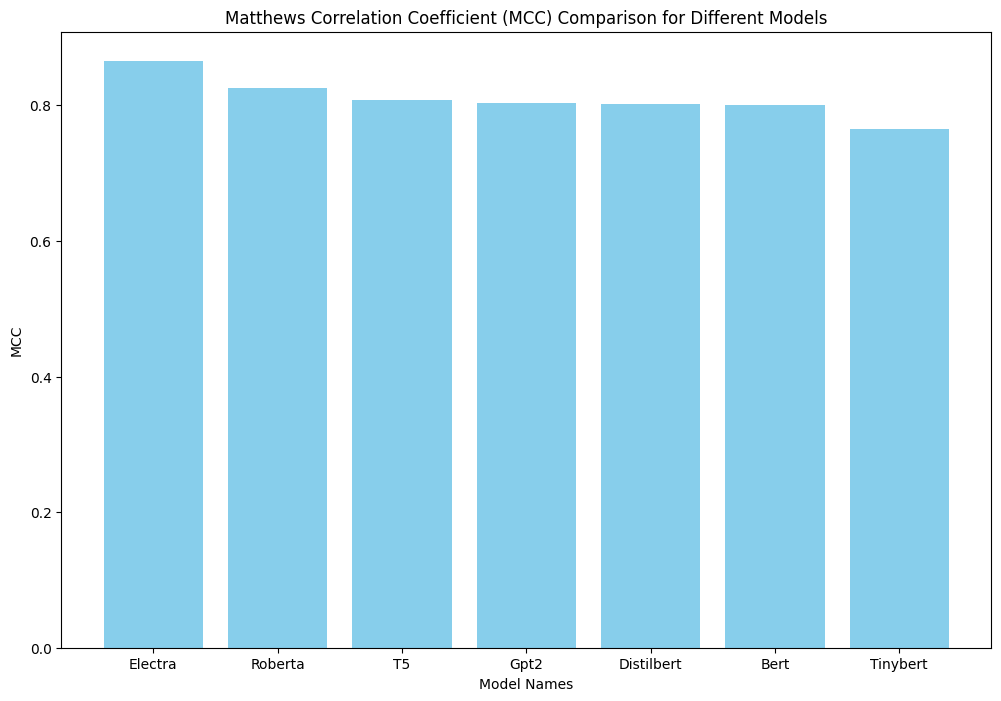

In [49]:

model_column = 'Model'
mcc_column = 'MCC'
df_sorted = df.sort_values(by=mcc_column, ascending=False)
plt.figure(figsize=(12, 8))
plt.bar(df_sorted[model_column], df_sorted[mcc_column], color='skyblue')
plt.xlabel('Model Names')
plt.ylabel('MCC')
plt.title('Matthews Correlation Coefficient (MCC) Comparison for Different Models')
plt.savefig('Matthews Correlation Coefficient.png', bbox_inches='tight')
plt.show()

<ipython-input-48-9ceeac3d17aa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Topsis Score', y='Model', data=df_topsis, palette='plasma')


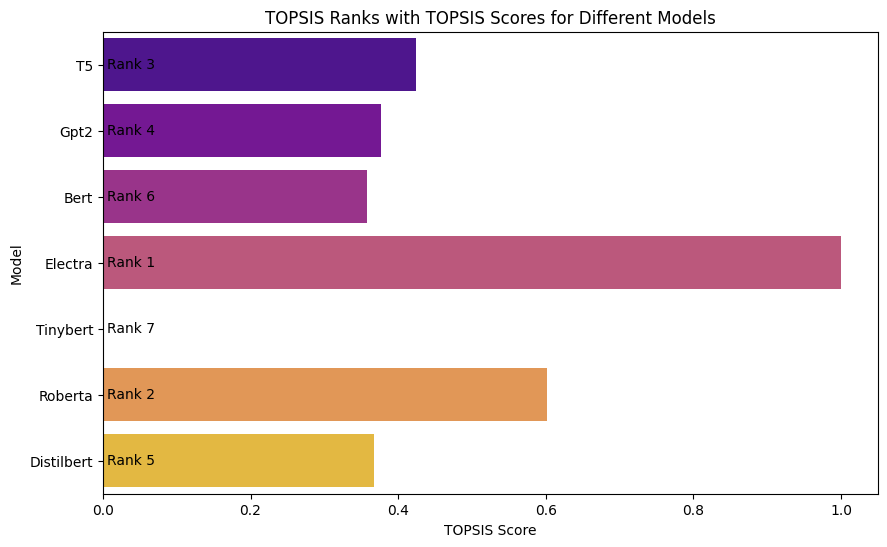

In [48]:
df_topsis = pd.read_csv('/content/topsis_results.csv')

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Topsis Score', y='Model', data=df_topsis, palette='plasma')

for index, value in enumerate(df_topsis['Rank']):
    bar_plot.text(0.005, index, f'Rank {value}', ha='left', va='center', fontsize=10)

plt.title('TOPSIS Ranks with TOPSIS Scores for Different Models')
plt.xlabel('TOPSIS Score')
plt.ylabel('Model')
plt.savefig('topsis_ranks_horizontal.png', bbox_inches='tight')
plt.show()